### POSTTEST 6
## Muhammad Basith Algiffari
## 2009100671

Import library yang digunakan

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

membaca file csv di folder Posttest_KB_5

In [30]:
df = pd.read_csv('../Posttest_KB_5/diabetes.csv');
df['Outcome'] = df.Outcome

menampilkan dataset

In [31]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


membikin model menggunakan metode K-Means dengan tetangga terdekat 2

In [32]:
kmean = KMeans(n_clusters=2)

memilih attribute yang akan dilatih

In [33]:
x_data = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

melakukan fit terhadap model

In [34]:
kmean.fit(x_data)

KMeans(n_clusters=2)

menentukan label untuk cluster

In [35]:
x_label = kmean.labels_

menampilkan hasil dari clustering

In [36]:
print(x_label)

[1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 

Membuat data frame untuk hasil clustering

In [37]:
dataset_kmeans = pd.DataFrame({'label' : x_label, 'hasil' : df.Outcome})

Membuat tampilan cluster dengan fungsi crosstab

In [46]:
ctb = pd.crosstab(dataset_kmeans['label'], dataset_kmeans['hasil'])
ctb

hasil,0,1
label,,
0,79,86
1,421,182


menggunakan cluster_centers_ untuk mendapatkan nilai centroid

In [51]:
centroid = kmean.cluster_centers_
centroid

array([[  3.7030303 , 141.46060606,  72.78787879,  31.2       ,
        253.70909091,  34.98545455,   0.59724848,  33.7030303 ],
       [  3.88391376, 115.26699834,  68.09784411,  17.6185738 ,
         32.21227197,  31.17363184,   0.43757048,  33.11442786]])

In [52]:
x = x_data['Glucose']
y = x_data['BMI']

mengambil nilai centroid dari atribut Glucose dan BMI

In [53]:
centroid_x = centroid[:,1]
centroid_y = centroid[:,5]

menampilkan hasil cluster menggunakan scatter plot

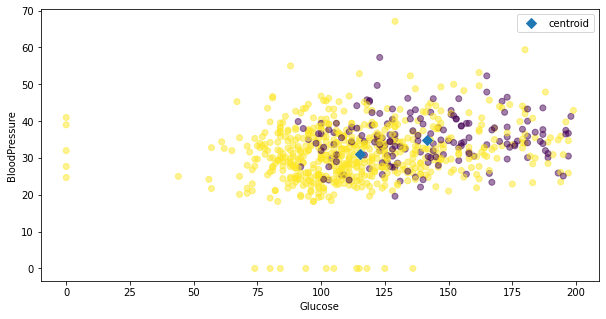

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha=0.5, c=x_label)
plt.scatter(centroid_x, centroid_y, marker='D', s=50, label='centroid')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

Metode Elbow berguna untuk menentukan jumlah cluster yang efisien dan baik. Kesimpulan yang bisa diambil dari grafik dibawah adalah cluster 3 merupakan jumlah cluster yang bagus untuk digunakan

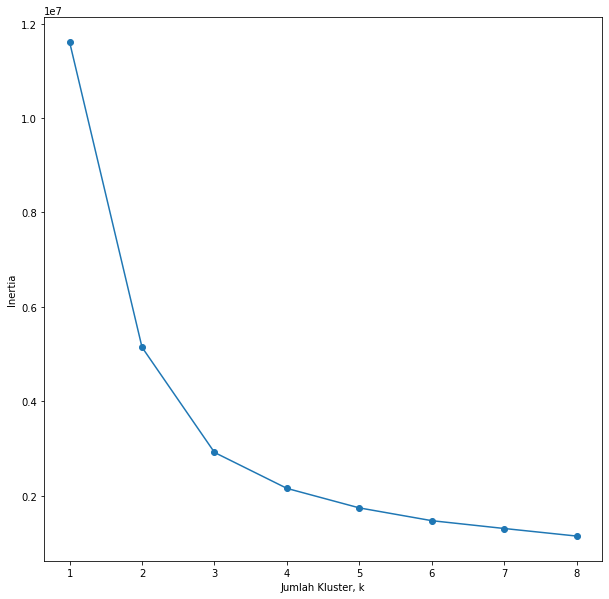

In [45]:
ks = range(1, 9)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_data)
    inertias.append(kmeans.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Kluster, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()